<a href="https://colab.research.google.com/github/xxcramseyxx/rnn-lstm/blob/main/RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/Google_Stock_Price_Train.csv')
train_set = df.iloc[:,1:2].values


In [ ]:
print(train_set)


[[4438.  ]
 [4384.  ]
 [4343.25]
 [4421.75]
 [4421.75]
 [4464.25]
 [4472.  ]
 [4444.5 ]
 [4469.  ]
 [4458.25]
 [4492.25]
 [4512.5 ]
 [4519.25]
 [4534.5 ]
 [4535.25]
 [4521.25]
 [4520.5 ]
 [4525.25]
 [4505.5 ]
 [4466.5 ]
 [4493.  ]
 [4482.5 ]
 [4475.5 ]]


# Feature Scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_set_scaled = sc.fit_transform(train_set)
print(train_set_scaled)

[[0.49348958]
 [0.21223958]
 [0.        ]
 [0.40885417]
 [0.40885417]
 [0.63020833]
 [0.67057292]
 [0.52734375]
 [0.65494792]
 [0.59895833]
 [0.77604167]
 [0.88151042]
 [0.91666667]
 [0.99609375]
 [1.        ]
 [0.92708333]
 [0.92317708]
 [0.94791667]
 [0.84505208]
 [0.64192708]
 [0.77994792]
 [0.72526042]
 [0.68880208]]


# Creating A New Data Structure with 60 timesteps and 1 output
 

---



In [ ]:
X_train = []
y_train = []
for i in range(60, 1258): #setting the timesteps
  X_train.append(train_set_scaled[i-60:i, 0])
  y_train.append(train_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train)
print(y_train)

IndexError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Reshaping


In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


# Building the RNN


# Importing the Keras libraries and packages


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialization the RNN

In [ ]:
regressor = Sequential()

# Activation the first LSTM layer and some Dropout regularization

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# Activation the second LSTM layer and some Dropout regularization

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Activation the third LSTM layer and some Dropout regularization

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Activation the fourth LSTM layer and some Dropout regularization

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


#Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))


# Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 123ms/step - loss: 0.1682
Epoch 2/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0641
Epoch 3/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0529
Epoch 4/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0434
Epoch 5/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0259
Epoch 6/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0131
Epoch 7/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0072
Epoch 8/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0065
Epoch 9/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0060
Epoch 10/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0059
Epoch 11/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0060
Epoch 12/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0058
Epoch 13/100

# Making the predictions and visualizing the results

# Getting the real stock prices from 2017

In [ ]:
df_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
real_stock_price = df_test.iloc[:, 1:2].values
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


# Getting the predicted stock prices of 2017

In [ ]:
df_total = pd.concat((df['Open'],df_test['Open']), axis = 0) 
inputs = df_total[len(df) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80): #divide the total inputs by the timesteps then add to
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_stock_price = regressor.predict(X_test)
pred_stock_price = sc.inverse_transform(pred_stock_price)


# Visualizing the results

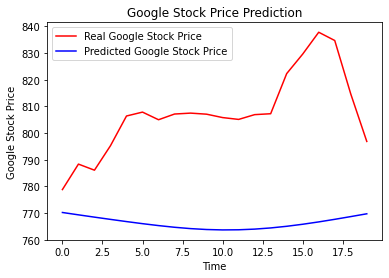

In [ ]:
plt.plot(real_stock_price, color ='red', label ='Real Google Stock Price')
plt.plot(pred_stock_price, color ='blue', label ='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
